# The Joy of Data

In [15]:
import ast
import json
import influxdb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cookbook import Cookbook
import seaborn as sns

%matplotlib inline

In [16]:
sns.set_palette('husl', 2)

# Goals

- Create a verified data product from raw data
- Can apply arbitrary transformations (e.g. rating curves), tests, and annotations for the purposes of QAQC and data provenance.
- Uses documents that are:
  - Language-agnostic
  - Versionable
  - Human readable
- Primarily intended for in-situ sensor data
- Must be suitable for real-time applications (e.g. both batch and streaming)

# Basic structure

## 🌶 Ingredients

- Specifies the source datasets to be used in the recipe.

## 🥘 Recipe

- Describes a series of transformations and annotations on each ingredient.

## 🍜 Servings

- Describes the translation of the finished recipe to some output (e.g. csv, database, netcdf).

# Specifying ingredients

- Requires a handle to some dataset, along with a driver for reading that dataset into a standard format.
- Currently supported formats include n-dimensional arrays with labeled indices (e.g. pandas Series and DataFrames).
- Drivers are loaded into the "cookbook" class.
- Configuration information for drivers is specified in JSON or JSONLD.

# Specifying recipes

Recipes apply a series of transformations and annotations to the data.

The primary operations include:

- **Query**: Returns a subset of the target dataset.
- **Drop**: Drops a subset of the target dataset.
- **Join**: Concatenate multiple datasets along some axis.
- **Transformation**: A size-preserving transformation on the data (e.g. adding, exponentiation, trig functions, rule-based replacements, FFT, etc.)
  - Note that built-in transformations are largely based on numpy and pandas ufuncs.
- **Aggregation**: Aggregates the dataset along some axis (e.g. sum, product, cumulative sum, all, any). 
- **Delete**: Removes a dataset from memory.
- **Annotation**: Apply an annotation to a subset of the data (by index, or by conditional statement).

# Specifying servings

- Essentially the converse of "ingredients".
- Requires a handle to some output dataset or database, along with a driver for writing the data.

# Running some examples

In [17]:
mbd = Cookbook('../example/mary-beth-doyle.jsonld')

In [18]:
mbd.run()

In [19]:
sycamore = Cookbook('../example/sycamore-sycamore_school.jsonld')

In [20]:
sycamore.run()

# Let's take a look at one of the annotations

In [21]:
annotation = mbd.annotations['maxbotix_depth']['spikes']

In [22]:
annotation

{'description': 'Spikes detected',
 'flag': '\U0001f994',
 'loggedBy': 'automated',
 'where': 2016-11-20 21:41:27.916880793    False
 2016-11-20 21:44:11.359795756     True
 2016-11-20 21:49:10.050333386    False
 2016-11-20 21:51:58.040954752    False
 2016-11-20 21:54:41.758974129    False
 2016-11-20 21:57:29.745917539    False
 2016-11-20 22:00:13.833808547    False
 2016-11-20 22:02:56.626770924    False
 2016-11-20 22:05:42.037187088    False
 2016-11-20 22:08:16.620283008    False
 2016-11-20 22:14:27.238977312     True
 2016-11-20 22:17:13.494983992    False
 2016-11-20 22:21:57.204792269    False
 2016-11-20 22:24:47.706892189    False
 2016-11-20 22:27:46.735271555    False
 2016-11-20 22:30:45.412628404    False
 2016-11-20 22:33:35.272682879    False
 2016-11-20 22:36:28.070646080    False
 2016-11-20 22:39:18.726371312    False
 2016-11-20 22:42:15.930703868    False
 2016-11-20 22:45:12.621929290    False
 2016-11-20 22:48:06.421169749    False
 2016-11-20 22:50:56.094274

In [23]:
emojis = annotation['where'].map({True: annotation['flag'], False: '😀'})

In [24]:
emojis.head(20)

2016-11-20 21:41:27.916880793    😀
2016-11-20 21:44:11.359795756    🦔
2016-11-20 21:49:10.050333386    😀
2016-11-20 21:51:58.040954752    😀
2016-11-20 21:54:41.758974129    😀
2016-11-20 21:57:29.745917539    😀
2016-11-20 22:00:13.833808547    😀
2016-11-20 22:02:56.626770924    😀
2016-11-20 22:05:42.037187088    😀
2016-11-20 22:08:16.620283008    😀
2016-11-20 22:14:27.238977312    🦔
2016-11-20 22:17:13.494983992    😀
2016-11-20 22:21:57.204792269    😀
2016-11-20 22:24:47.706892189    😀
2016-11-20 22:27:46.735271555    😀
2016-11-20 22:30:45.412628404    😀
2016-11-20 22:33:35.272682879    😀
2016-11-20 22:36:28.070646080    😀
2016-11-20 22:39:18.726371312    😀
2016-11-20 22:42:15.930703868    😀
dtype: object

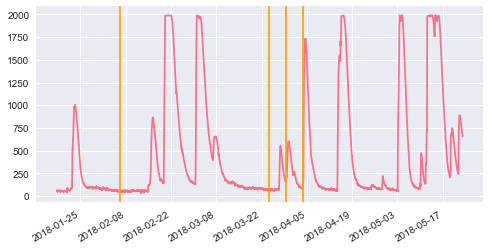

In [25]:
fig, ax = plt.subplots(figsize=(8, 4))

mbd.maxbotix_depth.iloc[-10000:].plot(ax=ax)

annotation_where = annotation['where'][-10000:]

for timestamp in annotation_where[annotation_where].index:
    ax.axvline(timestamp, color='orange')